In [1]:
import torch
from diffusers import AnimateDiffPipeline, MotionAdapter, EulerDiscreteScheduler
from diffusers.utils import export_to_gif, export_to_video
from huggingface_hub import hf_hub_download
from safetensors.torch import load_file
import os

device = "cuda"
dtype = torch.float16

step = 4  # Options: [1,2,4,8]
repo = "ByteDance/AnimateDiff-Lightning"
ckpt = f"animatediff_lightning_{step}step_diffusers.safetensors"
base = "sinkinai/anime-pastel-dream-soft-baked-vae"  # Choose to your favorite base model.

adapter = MotionAdapter().to(device, dtype)
adapter.load_state_dict(load_file(hf_hub_download(repo ,ckpt), device=device))
pipe = AnimateDiffPipeline.from_pretrained(base, motion_adapter=adapter, torch_dtype=dtype).to(device)
pipe.scheduler = EulerDiscreteScheduler.from_config(pipe.scheduler.config, timestep_spacing="trailing", beta_schedule="linear")
pipe.enable_vae_slicing()

output = pipe(
    prompt="a girl is looking at flowers on a hill, yellow flower field, 1girl, solo, upper body, blue sky, cliff above the sea, best quality", 
    guidance_scale=1.0, 
    generator=torch.Generator("cpu").manual_seed(42),
    num_inference_steps=step)

frames = output.frames[0]
output_path = "generated/30_lightning_t2v_anime_4"
os.makedirs(os.path.dirname(output_path), exist_ok=True)
export_to_video(frames, output_path+".mp4")
export_to_gif(frames, output_path+".gif")


vae/diffusion_pytorch_model.safetensors not found


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
The config attributes {'center_input_sample': False, 'flip_sin_to_cos': True, 'freq_shift': 0, 'mid_block_type': 'UNetMidBlock2DCrossAttn', 'only_cross_attention': False, 'attention_head_dim': 8, 'dual_cross_attention': False, 'class_embed_type': None, 'num_class_embeds': None, 'upcast_attention': False, 'resnet_time_scale_shift': 'default', 'time_embedding_type': 'positional', 'timestep_post_act': None, 'conv_in_kernel': 3, 'conv_out_kernel': 3, 'class_embeddings_concat': False} were passed to UNetMotionModel, but are not expected and will be ignored. Please verify your config.json configuration file.


  0%|          | 0/4 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


'generated/30_lightning_t2v_anime_4.gif'

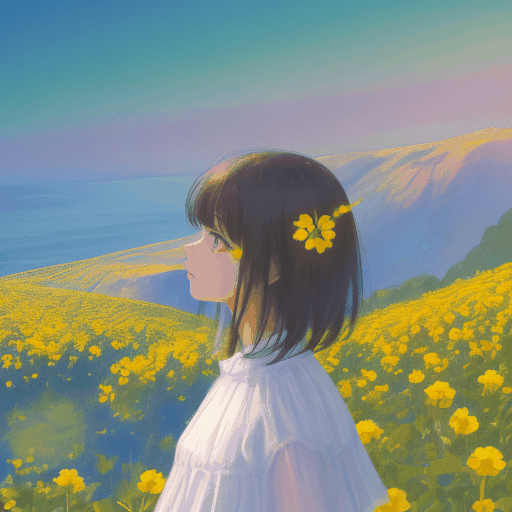

In [2]:
from IPython.display import Image

Image(output_path+".gif")

In [3]:
step = 8  # Options: [1,2,4,8]
repo = "ByteDance/AnimateDiff-Lightning"
ckpt = f"animatediff_lightning_{step}step_diffusers.safetensors"
base = "sinkinai/anime-pastel-dream-soft-baked-vae"  # Choose to your favorite base model.

adapter = MotionAdapter().to(device, dtype)
adapter.load_state_dict(load_file(hf_hub_download(repo ,ckpt), device=device))
pipe = AnimateDiffPipeline.from_pretrained(base, motion_adapter=adapter, torch_dtype=dtype).to(device)
pipe.scheduler = EulerDiscreteScheduler.from_config(pipe.scheduler.config, timestep_spacing="trailing", beta_schedule="linear")
pipe.enable_vae_slicing()

output = pipe(
    prompt="a girl is looking at flowers on a hill, yellow flower field, 1girl, solo, upper body, blue sky, cliff above the sea, best quality", 
    guidance_scale=1.0, 
    generator=torch.Generator("cpu").manual_seed(42),
    num_inference_steps=step)

frames = output.frames[0]
output_path = "generated/30_lightning_t2v_anime_8"
os.makedirs(os.path.dirname(output_path), exist_ok=True)
export_to_video(frames, output_path+".mp4")
export_to_gif(frames, output_path+".gif")


(…)ff_lightning_8step_diffusers.safetensors:   0%|          | 0.00/908M [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors not found


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

The config attributes {'center_input_sample': False, 'flip_sin_to_cos': True, 'freq_shift': 0, 'mid_block_type': 'UNetMidBlock2DCrossAttn', 'only_cross_attention': False, 'attention_head_dim': 8, 'dual_cross_attention': False, 'class_embed_type': None, 'num_class_embeds': None, 'upcast_attention': False, 'resnet_time_scale_shift': 'default', 'time_embedding_type': 'positional', 'timestep_post_act': None, 'conv_in_kernel': 3, 'conv_out_kernel': 3, 'class_embeddings_concat': False} were passed to UNetMotionModel, but are not expected and will be ignored. Please verify your config.json configuration file.


  0%|          | 0/8 [00:00<?, ?it/s]

'generated/30_lightning_t2v_anime_8.gif'

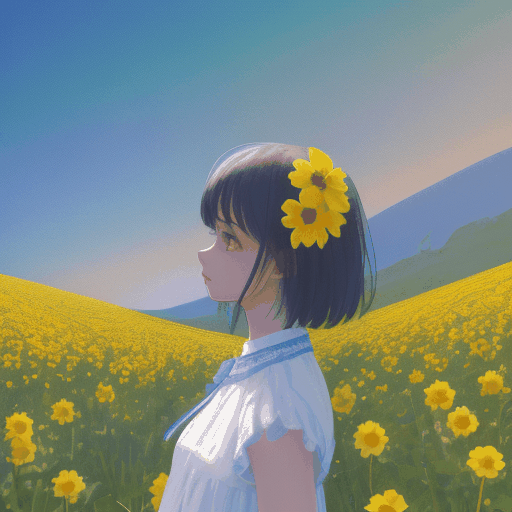

In [4]:
Image(output_path+".gif")

In [ ]:
## 6.7GB -> 9.8GB